In [1]:
import pandas as pd

# Cargar el Excel (única hoja)
df_grado = pd.read_excel(r"C:\Users\0021878\Downloads\test_grado_completo_con_scoring.xlsx")

# Vista rápida de las primeras filas
df_grado.head(5) # Juan: Si pones un df_grado.head(5) sólo te muestra algunos registros :)

,ACCOUNTID,ID,ID18__PC,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,...,CH_ANTIGUOALUMNO_INTERCAMBIO,CH_HIJO_ANTIGUO_ALUMNO__PC,PCA1,PCA2,cluster,interpretacion_cluster,etapa_compuesta,etapa_ordinal_num,prediction_label,prob_matricula_real
0,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-9.925818,34.478101,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,0,0,0.0100
1,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-2.923296,2.295669,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,0,0,0.0000
2,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-2.274656,-0.685373,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,0,0,0.0015
3,0011r00002NftnMAAR,0066900001W0Y3GAAV,0031r00002gzdqcAAA,0,0,2025/2026,True,NaN,NaN,False,...,False,False,-2.323181,1.899729,4,Perfil mixto / no dominante,Matrícula Admisión__Inicio,0,0,0.0100
4,0011r00002NftnMAAR,0066900001W0Y3GAAV,0031r00002gzdqcAAA,0,0,2025/2026,True,NaN,NaN,False,...,False,False,-8.565469,30.588251,4,Perfil mixto / no dominante,Matrícula Admisión__Inicio,0,0,0.0300


In [2]:
df_grado.shape

(105965, 62)

## Variable Visita Campus

### Revisar que la variable Visita Campus está en el conjunto de datos.

In [3]:
# Comprobar si la columna existe
if "CH_VISITACAMPUS__PC" in df_grado.columns:
    print("✅ La columna 'CH_VISITACAMPUS__PC' está en el dataset.")
else:
    print("❌ La columna 'CH_VISITACAMPUS__PC' NO está en el dataset.")

print(df_grado["CH_VISITACAMPUS__PC"].head(10))


✅ La columna 'CH_VISITACAMPUS__PC' está en el dataset.
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: CH_VISITACAMPUS__PC, dtype: bool


### Analizar % de true y de false que tiene(por ID único).

CH_VISITACAMPUS__PC
False    82.127456
True     17.872544
Name: proportion, dtype: float64


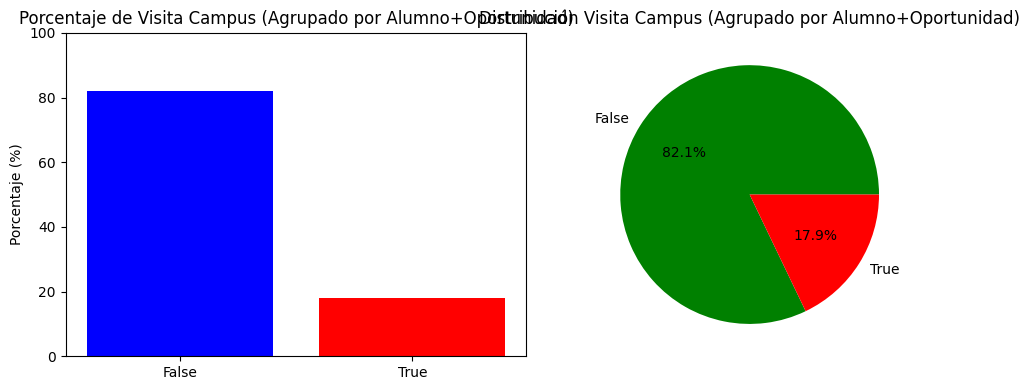

In [4]:
import matplotlib.pyplot as plt

# 1. Crear un identificador combinado
df_grado["ID_COMBINADO"] = df_grado["ID"].astype(str) + "_" + df_grado["ACCOUNTID"].astype(str)

# 2. Agrupar por ID_COMBINADO y calcular la probabilidad media
df_agrupado = (
    df_grado
    .groupby("ID_COMBINADO", as_index=False)
    .agg({
        "CH_VISITACAMPUS__PC": "first",  # asumimos que no cambia dentro de la combinación
        "prob_matricula_real": "mean"
    })
)

# 3. Calcular porcentajes sobre el conjunto agrupado
porcentaje_visita = df_agrupado["CH_VISITACAMPUS__PC"].value_counts(normalize=True) * 100
print(porcentaje_visita)

# 4. Gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Barras
axes[0].bar(porcentaje_visita.index.astype(str), porcentaje_visita.values, color=['blue', 'red'])
axes[0].set_title("Porcentaje de Visita Campus (Agrupado por Alumno+Oportunidad)")
axes[0].set_ylabel("Porcentaje (%)")
axes[0].set_ylim(0, 100)

# Pie chart
axes[1].pie(porcentaje_visita.values, labels=porcentaje_visita.index.astype(str),
            autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title("Distribución Visita Campus (Agrupado por Alumno+Oportunidad)")

plt.tight_layout()
plt.show()


In [5]:
# Ver si hay alumnos con valores distintos en CH_VISITACAMPUS__PC
cambios = df_grado.groupby("ID")["CH_VISITACAMPUS__PC"].nunique()
print(cambios.value_counts())  # cuántos tienen 1 valor único y cuántos tienen más de 1


CH_VISITACAMPUS__PC
1    14609
Name: count, dtype: int64


#### Comparar medias de probabilidad

In [7]:
# Media de probabilidad en el dataset original (todas las filas)
media_original = df_grado["prob_matricula_real"].mean()

# Agrupar por Alumno+Oportunidad y calcular la probabilidad media
df_agrupado = (
    df_grado
    .groupby(["ID", "ACCOUNTID"], as_index=False)
    .agg({
        "CH_VISITACAMPUS__PC": "first",
        "prob_matricula_real": "mean"
    })
)

# Media de probabilidad en el dataset agrupado
media_agrupada = df_agrupado["prob_matricula_real"].mean()

print(f"📊 Media original: {media_original:.4f}")
print(f"📊 Media agrupada por Alumno+Oportunidad: {media_agrupada:.4f}")
print(f"🔍 Diferencia: {media_agrupada - media_original:.4f}")


📊 Media original: 0.4385
📊 Media agrupada por Alumno+Oportunidad: 0.2396
🔍 Diferencia: -0.1988


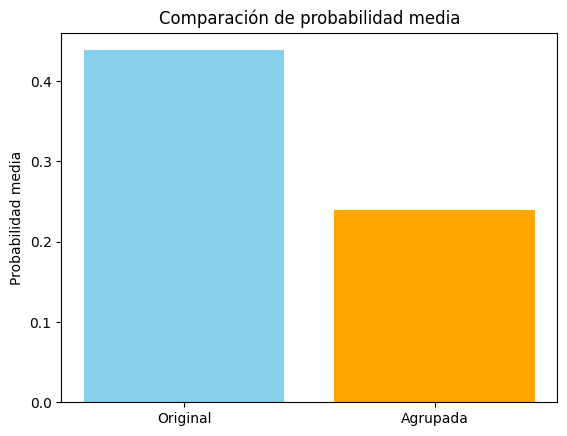

In [8]:
import matplotlib.pyplot as plt

plt.bar(["Original", "Agrupada"], [media_original, media_agrupada], color=["skyblue", "orange"])
plt.ylabel("Probabilidad media")
plt.title("Comparación de probabilidad media")
plt.show()


### Análisis de las probabilidades para los que visitan y los que no

                       count      mean       std  min  25%    50%       75%  \
CH_VISITACAMPUS__PC                                                           
False                11998.0  0.224750  0.367290  0.0  0.0  0.009  0.302622   
True                  2611.0  0.308074  0.392365  0.0  0.0  0.024  0.759286   

                     max  
CH_VISITACAMPUS__PC       
False                1.0  
True                 1.0  


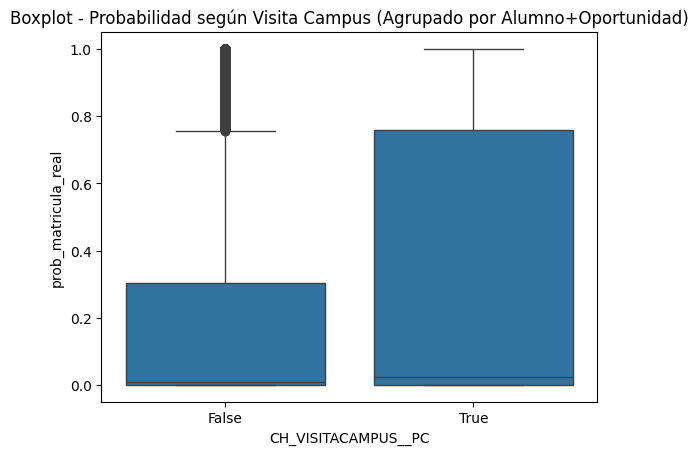

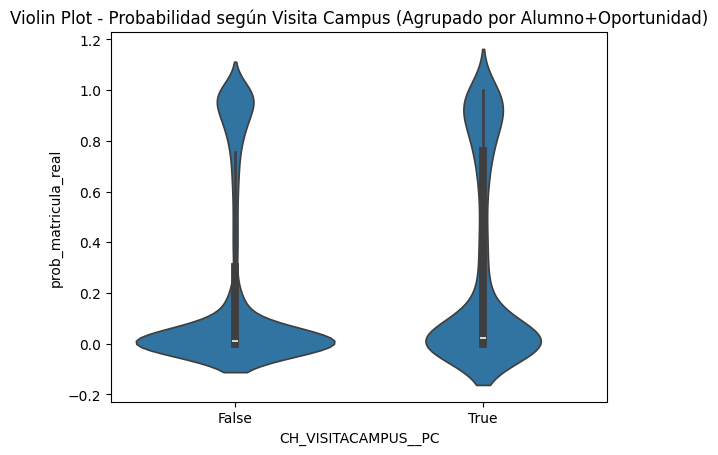

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por Alumno+Oportunidad y calcular la probabilidad media
df_agrupado = (
    df_grado
    .groupby(["ID", "ACCOUNTID"], as_index=False)
    .agg({
        "CH_VISITACAMPUS__PC": "first",   # asumimos que no cambia dentro de la combinación
        "prob_matricula_real": "mean"     # media de probabilidad por combinación
    })
)

# Estadísticas por grupo
stats_visita = df_agrupado.groupby("CH_VISITACAMPUS__PC")["prob_matricula_real"].describe()
print(stats_visita)

# Boxplot
sns.boxplot(x="CH_VISITACAMPUS__PC", y="prob_matricula_real", data=df_agrupado)
plt.title("Boxplot - Probabilidad según Visita Campus (Agrupado por Alumno+Oportunidad)")
plt.show()

# Violin plot
sns.violinplot(x="CH_VISITACAMPUS__PC", y="prob_matricula_real", data=df_agrupado)
plt.title("Violin Plot - Probabilidad según Visita Campus (Agrupado por Alumno+Oportunidad)")
plt.show()


## Carga de los datos: test_master_completo_con_scoring 6

In [10]:
import pandas as pd

# Cargar el Excel (única hoja)
df_master = pd.read_excel(r"C:\Users\0021878\Downloads\test_master_completo_con_scoring.xlsx")

# Vista rápida de las primeras filas
df_master.head(10)

,ACCOUNTID,ID,ID18__PC,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,...,CH_ANTIGUO_ALUMNO__PC,CH_ALUMNI__PC,CH_ANTIGUOALUMNO_INTERCAMBIO,CH_HIJO_ANTIGUO_ALUMNO__PC,PCA1,PCA2,cluster,interpretacion_cluster,prediction_label,prob_matricula_real
0,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-5.463977,18.799213,4,Perfil mixto / no dominante,1,0.9869
1,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-1.021142,-1.619322,4,Perfil mixto / no dominante,1,0.9986
2,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.986269,-1.779593,4,Perfil mixto / no dominante,1,0.9988
3,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9982
4,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9982
5,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9982
6,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-1.600036,1.041178,4,Perfil mixto / no dominante,1,0.9987
7,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9982
8,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9982
9,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9982


In [11]:
df_master.shape

(3681, 60)

### Porcentaje de true y de false(con IDs únicos también)

CH_ANTIGUO_ALUMNO__PC
False    89.315526
True     10.684474
Name: proportion, dtype: float64


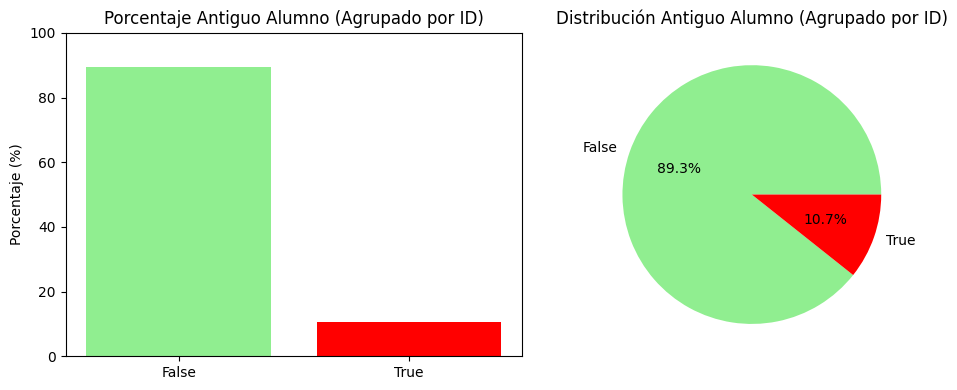

In [12]:
import matplotlib.pyplot as plt

# 1. Agrupar por ID y calcular la probabilidad media para cada alumno
df_master_agrupado = (
    df_master
    .groupby("ID", as_index=False)
    .agg({
        "CH_ANTIGUO_ALUMNO__PC": "first",   # asumimos que no cambia por alumno
        "prob_matricula_real": "mean"       # media de probabilidad por alumno
    })
)

# 2. Calcular porcentajes sobre el conjunto agrupado
porcentaje_antiguo = df_master_agrupado["CH_ANTIGUO_ALUMNO__PC"].value_counts(normalize=True) * 100
print(porcentaje_antiguo)

# 3. Gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Barras
axes[0].bar(porcentaje_antiguo.index.astype(str), porcentaje_antiguo.values, color=['lightgreen', 'red'])
axes[0].set_title("Porcentaje Antiguo Alumno (Agrupado por ID)")
axes[0].set_ylabel("Porcentaje (%)")
axes[0].set_ylim(0, 100)

# Pie chart
axes[1].pie(porcentaje_antiguo.values, labels=porcentaje_antiguo.index.astype(str),
            autopct='%1.1f%%', colors=['lightgreen', 'red'])
axes[1].set_title("Distribución Antiguo Alumno (Agrupado por ID)")

plt.tight_layout()
plt.show()


### Análisis de las probabilidades para los antiguos alumnos y los que no del conjunto de datos de máster(ID único)

✅ No hay probabilidades negativas.

📊 Estadísticas por grupo:
                        count      mean       std      min    25%      50%  \
CH_ANTIGUO_ALUMNO__PC                                                       
False                  535.0  0.227547  0.384647  0.00015  0.001  0.02710   
True                    64.0  0.604557  0.467225  0.00027  0.020  0.99291   

                            75%  max  
CH_ANTIGUO_ALUMNO__PC                 
False                  0.189600  1.0  
True                   0.999995  1.0  


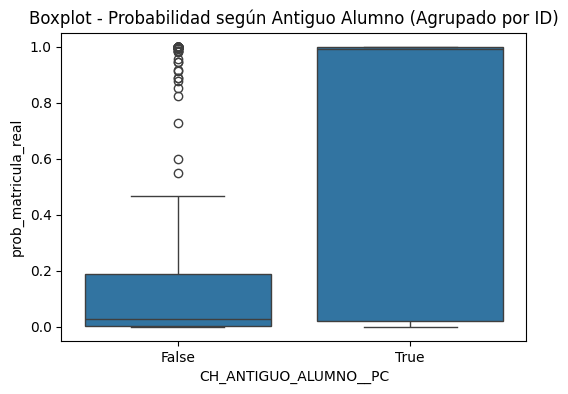

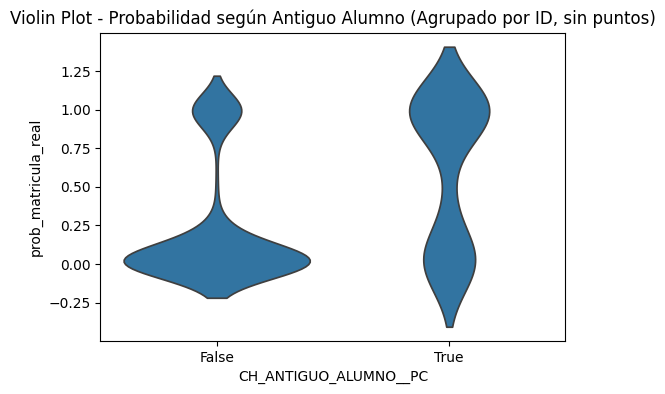

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Agrupar por ID y calcular la probabilidad media para cada alumno
df_master_agrupado = (
    df_master
    .groupby("ID", as_index=False)
    .agg({
        "CH_ANTIGUO_ALUMNO__PC": "first",   # asumimos que no cambia por alumno
        "prob_matricula_real": "mean"       # media de probabilidad por alumno
    })
)

# 2. Comprobar si hay probabilidades negativas
negativas = df_master_agrupado[df_master_agrupado["prob_matricula_real"] < 0]
if not negativas.empty:
    print(f"⚠ Hay {len(negativas)} registros con probabilidad negativa:")
    print(negativas)
else:
    print("✅ No hay probabilidades negativas.")

# 3. Estadísticas por grupo
stats_antiguo = df_master_agrupado.groupby("CH_ANTIGUO_ALUMNO__PC")["prob_matricula_real"].describe()
print("\n📊 Estadísticas por grupo:\n", stats_antiguo)

# 4. Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x="CH_ANTIGUO_ALUMNO__PC", y="prob_matricula_real", data=df_master_agrupado)
plt.title("Boxplot - Probabilidad según Antiguo Alumno (Agrupado por ID)")
plt.show()

# 5. Violin plot sin puntos individuales
plt.figure(figsize=(6,4))
sns.violinplot(x="CH_ANTIGUO_ALUMNO__PC", y="prob_matricula_real", data=df_master_agrupado, inner=None)
plt.title("Violin Plot - Probabilidad según Antiguo Alumno (Agrupado por ID, sin puntos)")
plt.show()


### Eliminando terreno negativo en el Violin Plot.

⚠ Hay 0 registros con probabilidad negativa


,ID,CH_ANTIGUO_ALUMNO__PC,prob_matricula_real



📊 Mínimos por grupo:
CH_ANTIGUO_ALUMNO__PC
False    0.00015
True     0.00027
Name: prob_matricula_real, dtype: float64


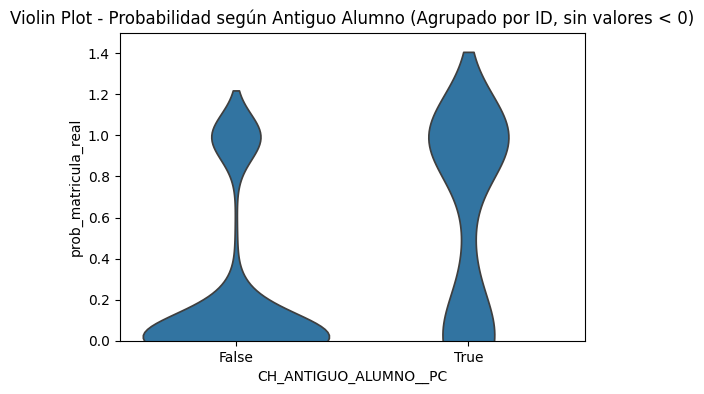

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Agrupar por ID y calcular la probabilidad media por alumno
df_master_agrupado = (
    df_master
    .groupby("ID", as_index=False)
    .agg({
        "CH_ANTIGUO_ALUMNO__PC": "first",   # asumimos que no cambia por alumno
        "prob_matricula_real": "mean"       # media de probabilidad por alumno
    })
)

# 2. Asegurar que la columna es numérica
df_master_agrupado["prob_matricula_real"] = pd.to_numeric(
    df_master_agrupado["prob_matricula_real"], errors="coerce"
)

# 3. Detectar negativos
negativas = df_master_agrupado[df_master_agrupado["prob_matricula_real"] < 0]
print(f"⚠ Hay {len(negativas)} registros con probabilidad negativa")
display(negativas)

# 4. Mínimos por grupo
print("\n📊 Mínimos por grupo:")
print(df_master_agrupado.groupby("CH_ANTIGUO_ALUMNO__PC")["prob_matricula_real"].min())

# 5. Violin plot ajustado (sin puntos y recortado a partir de 0)
plt.figure(figsize=(6,4))
sns.violinplot(
    x="CH_ANTIGUO_ALUMNO__PC",
    y="prob_matricula_real",
    data=df_master_agrupado,
    inner=None
)
plt.ylim(0, 1.5)  # Limitar eje Y de 0 a 1
plt.title("Violin Plot - Probabilidad según Antiguo Alumno (Agrupado por ID, sin valores < 0)")
plt.show()


#### Comprobando que, efectivamente, no hay probabilidades negativas.

In [15]:
import pandas as pd

# Asegurar que la columna es numérica
df_master_agrupado["prob_matricula_real"] = pd.to_numeric(df_master_agrupado["prob_matricula_real"], errors="coerce")

# Detectar negativos
negativas = df_master_agrupado[df_master_agrupado["prob_matricula_real"] < 0]

print(f"⚠ Hay {len(negativas)} registros con probabilidad negativa")
display(negativas)


⚠ Hay 0 registros con probabilidad negativa


,ID,CH_ANTIGUO_ALUMNO__PC,prob_matricula_real


In [16]:
print(df_master_agrupado.groupby("CH_ANTIGUO_ALUMNO__PC")["prob_matricula_real"].min())

CH_ANTIGUO_ALUMNO__PC
False    0.00015
True     0.00027
Name: prob_matricula_real, dtype: float64


In [17]:
print(df_master_agrupado["prob_matricula_real"].min())


0.0001499999999999835


In [18]:
negativas = df_master_agrupado[df_master_agrupado["prob_matricula_real"] < 0]

if not negativas.empty:
    print(f"⚠ Hay {len(negativas)} registros con probabilidad negativa:")
    display(negativas)  # Muestra en tabla bonita
else:
    print("✅ No hay probabilidades negativas.")


✅ No hay probabilidades negativas.


In [19]:
print(df_master["prob_matricula_real"].min())


0.0


## Medias de probabilidad para cada una de las etapas

### Calcular medias de probabilidad por etapa

    ORDINAL                          STAGENAME  prob_matricula_real
0       999                    Cerrada/Perdida             0.031942
1       999  Comisión de estudios de postgrado             0.034678
2       999                            Enviada             0.077369
3       999                     Estudio Centro             0.048709
4       999                             Inicio             0.023491
5       999                 Matrícula Admisión             0.412766
6       999                     Matrícula OOGG             0.825428
7       999                   Propuesta centro             0.066500
8       999                Pruebas de admisión             0.013405
9       999                      Reorientación             0.003080
10      999                         Resolución             0.027442
11      999                           Stand By             0.025757
12      999                         Validación             0.025028


C:\Users\0021878\AppData\Local\Temp\ipykernel_8036\1719228075.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_grado_agrupado["ORDINAL"].replace([np.inf, -np.inf], np.nan, inplace=True)


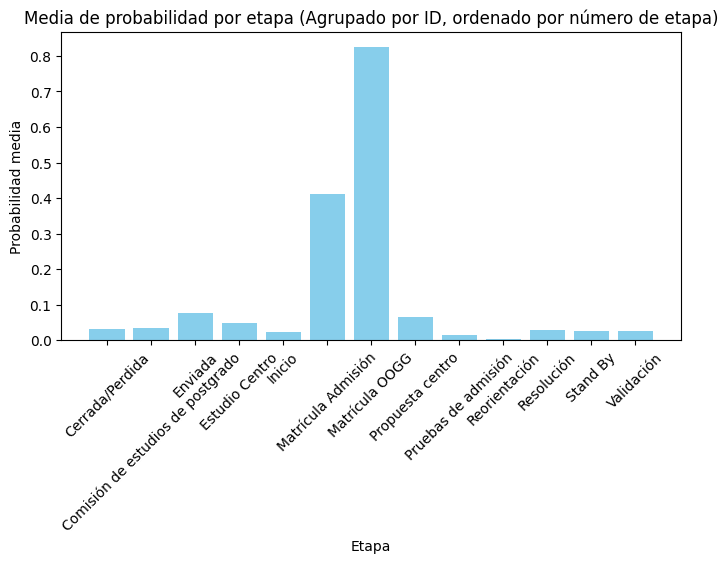

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Agrupar por ID y calcular la probabilidad media para cada alumno
df_grado_agrupado = (
    df_grado
    .groupby("ID", as_index=False)
    .agg({
        "STAGENAME": "first",          # asumimos que la etapa no cambia por alumno
        "prob_matricula_real": "mean"  # media de probabilidad por alumno
    })
)

# 2. Crear la variable ORDINAL extrayendo el número inicial de STAGENAME
df_grado_agrupado["ORDINAL"] = df_grado_agrupado["STAGENAME"].str.extract(r"^(\d+)")

# 3. Convertir a numérico y manejar NaN e infinitos
df_grado_agrupado["ORDINAL"] = pd.to_numeric(df_grado_agrupado["ORDINAL"], errors="coerce")
df_grado_agrupado["ORDINAL"].replace([np.inf, -np.inf], np.nan, inplace=True)

# 4. Rellenar NaN con un valor fijo alto (por ejemplo, 999) para que aparezcan al final
df_grado_agrupado["ORDINAL"] = df_grado_agrupado["ORDINAL"].fillna(999).astype(int)

# 5. Calcular medias por etapa ordenadas por ORDINAL
medias_por_etapa = (
    df_grado_agrupado
    .groupby(["ORDINAL", "STAGENAME"])["prob_matricula_real"]
    .mean()
    .reset_index()
    .sort_values("ORDINAL")
)

print(medias_por_etapa)

# 6. Gráfico de barras ordenado por ORDINAL
plt.figure(figsize=(8,4))
plt.bar(medias_por_etapa["STAGENAME"], medias_por_etapa["prob_matricula_real"], color='skyblue')
plt.title("Media de probabilidad por etapa (Agrupado por ID, ordenado por número de etapa)")
plt.ylabel("Probabilidad media")
plt.xlabel("Etapa")
plt.xticks(rotation=45)
plt.show()


### Calcular medias de probabilidad por etapa(Textos encuadrados y alineados)

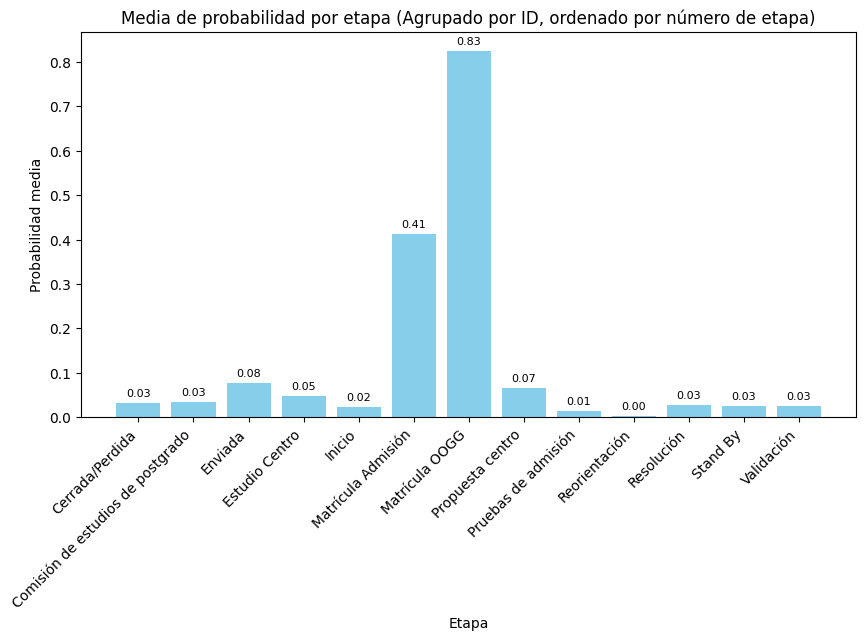

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(medias_por_etapa["STAGENAME"], medias_por_etapa["prob_matricula_real"], color='skyblue')

# Añadir etiquetas centradas sobre cada barra
for rect in bars:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width()/2,  # centro exacto de la barra
        height + 0.01,                      # un poco por encima de la barra
        f"{height:.2f}",                    # texto con 2 decimales
        ha='center', va='bottom', fontsize=8
    )

ax.set_title("Media de probabilidad por etapa (Agrupado por ID, ordenado por número de etapa)")
ax.set_ylabel("Probabilidad media")
ax.set_xlabel("Etapa")
plt.xticks(rotation=45, ha='right')  # rotar etiquetas pero mantener alineación
plt.show()


C:\Users\0021878\AppData\Local\Temp\ipykernel_23824\4047464714.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_grado_agrupado["ORDINAL"].replace([np.inf, -np.inf], np.nan, inplace=True)


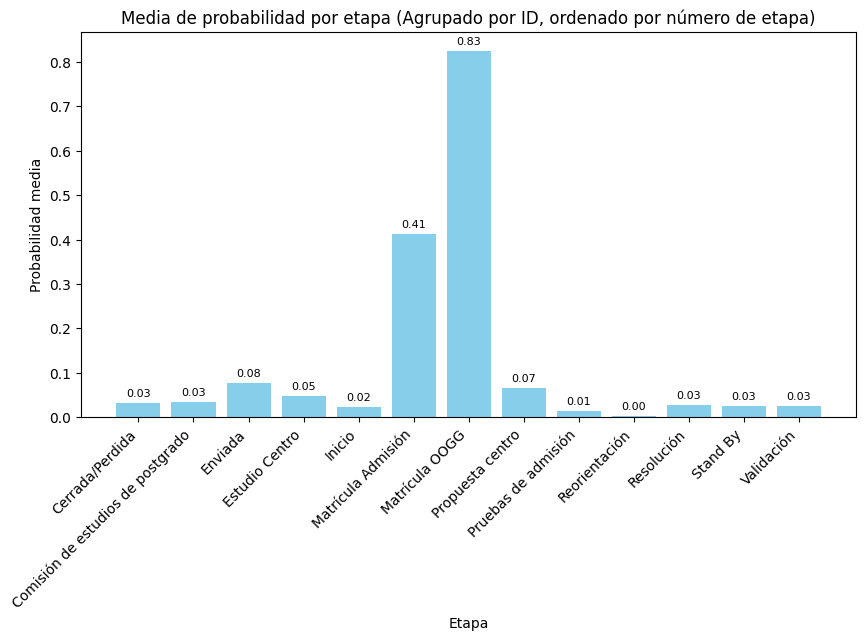

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Ejemplo: partimos de df_grado ya cargado ---
# Agrupar por ID y calcular la probabilidad media por alumno
df_grado_agrupado = (
    df_grado
    .groupby("ID", as_index=False)
    .agg({
        "STAGENAME": "first",
        "prob_matricula_real": "mean"
    })
)

# Crear variable ORDINAL extrayendo número inicial de STAGENAME
df_grado_agrupado["ORDINAL"] = df_grado_agrupado["STAGENAME"].str.extract(r"^(\d+)")
df_grado_agrupado["ORDINAL"] = pd.to_numeric(df_grado_agrupado["ORDINAL"], errors="coerce")
df_grado_agrupado["ORDINAL"].replace([np.inf, -np.inf], np.nan, inplace=True)
df_grado_agrupado["ORDINAL"] = df_grado_agrupado["ORDINAL"].fillna(999).astype(int)

# Calcular medias por etapa ordenadas por ORDINAL
medias_por_etapa = (
    df_grado_agrupado
    .groupby(["ORDINAL", "STAGENAME"])["prob_matricula_real"]
    .mean()
    .reset_index()
    .sort_values("ORDINAL")
)

# --- Gráfico de barras con etiquetas alineadas ---
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(medias_por_etapa["STAGENAME"], medias_por_etapa["prob_matricula_real"], color='skyblue')

# Añadir etiquetas centradas sobre cada barra
for rect in bars:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width()/2,
        height + 0.01,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=8
    )

# Configuración del gráfico
ax.set_title("Media de probabilidad por etapa (Agrupado por ID, ordenado por número de etapa)")
ax.set_ylabel("Probabilidad media")
ax.set_xlabel("Etapa")
plt.xticks(rotation=45, ha='right')
plt.show()


### Evolutivo de las probabilidades a  lo largo de las etapas(En el tiempo).
#### (Rectilínero)

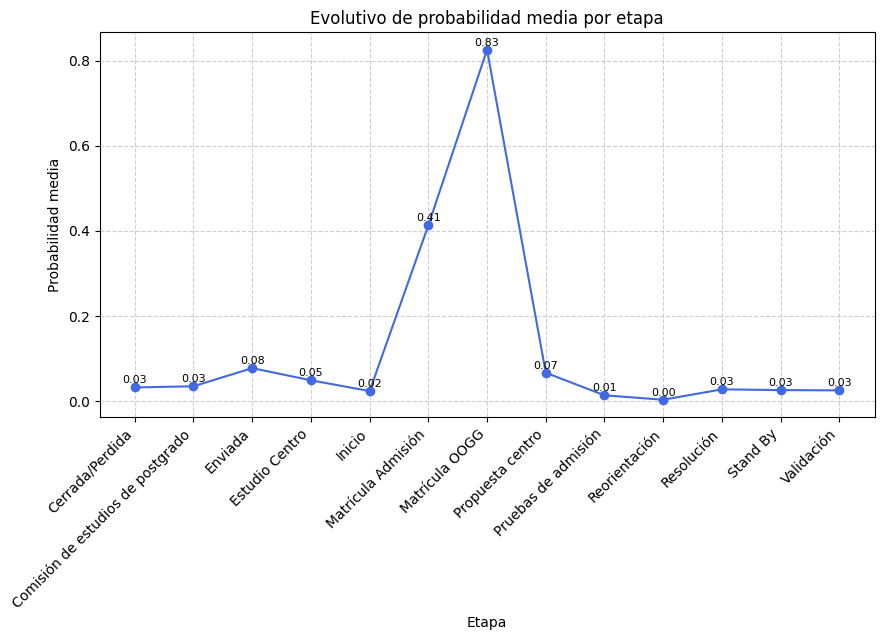

In [24]:
import matplotlib.pyplot as plt

# Evolutivo de probabilidad media por etapa
plt.figure(figsize=(10,5))
plt.plot(
    medias_por_etapa["STAGENAME"],
    medias_por_etapa["prob_matricula_real"],
    marker='o',
    linestyle='-',
    color='royalblue'
)

# Añadir etiquetas de valor sobre cada punto
for i, val in enumerate(medias_por_etapa["prob_matricula_real"]):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=8)

plt.title("Evolutivo de probabilidad media por etapa")
plt.ylabel("Probabilidad media")
plt.xlabel("Etapa")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Evolutivo de las probabilidades a  lo largo de las etapas(En el tiempo).
#### (Curvilínero)

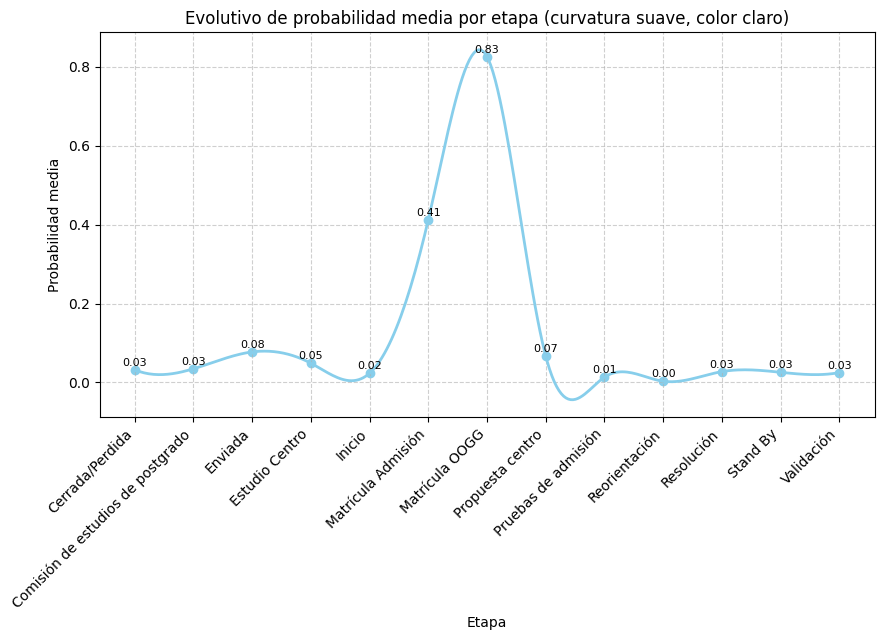

In [25]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Datos originales
x = np.arange(len(medias_por_etapa))
y = medias_por_etapa["prob_matricula_real"].values

# Crear interpolación spline
x_new = np.linspace(x.min(), x.max(), 300)  # más puntos para suavizar
spl = make_interp_spline(x, y, k=3)         # k=3 -> cúbica
y_smooth = spl(x_new)

# Gráfico suavizado
plt.figure(figsize=(10,5))
plt.plot(x_new, y_smooth, color='skyblue', linewidth=2)
plt.scatter(x, y, color='skyblue')  # puntos originales

# Etiquetas de valor en los puntos originales
for i, val in enumerate(y):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=8)

plt.title("Evolutivo de probabilidad media por etapa (curvatura suave, color claro)")
plt.ylabel("Probabilidad media")
plt.xlabel("Etapa")
plt.xticks(x, medias_por_etapa["STAGENAME"], rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Probando códigos

### Con Grado

In [37]:
import pandas as pd

# Cargar el Excel (única hoja)
df_grado = pd.read_excel(r"C:\Users\0021878\Downloads\test_grado_completo_con_scoring.xlsx")

# Vista rápida de las primeras filas
df_grado.head(5) # Juan: Si pones un df_grado.head(5) sólo te muestra algunos registros :)

,ACCOUNTID,ID,ID18__PC,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,...,CH_ANTIGUOALUMNO_INTERCAMBIO,CH_HIJO_ANTIGUO_ALUMNO__PC,PCA1,PCA2,cluster,interpretacion_cluster,etapa_compuesta,etapa_ordinal_num,prediction_label,prob_matricula_real
0,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-9.925818,34.478101,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,0,0,0.0100
1,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-2.923296,2.295669,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,0,0,0.0000
2,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-2.274656,-0.685373,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,0,0,0.0015
3,0011r00002NftnMAAR,0066900001W0Y3GAAV,0031r00002gzdqcAAA,0,0,2025/2026,True,NaN,NaN,False,...,False,False,-2.323181,1.899729,4,Perfil mixto / no dominante,Matrícula Admisión__Inicio,0,0,0.0100
4,0011r00002NftnMAAR,0066900001W0Y3GAAV,0031r00002gzdqcAAA,0,0,2025/2026,True,NaN,NaN,False,...,False,False,-8.565469,30.588251,4,Perfil mixto / no dominante,Matrícula Admisión__Inicio,0,0,0.0300


In [38]:
df_grado.shape

(105965, 62)

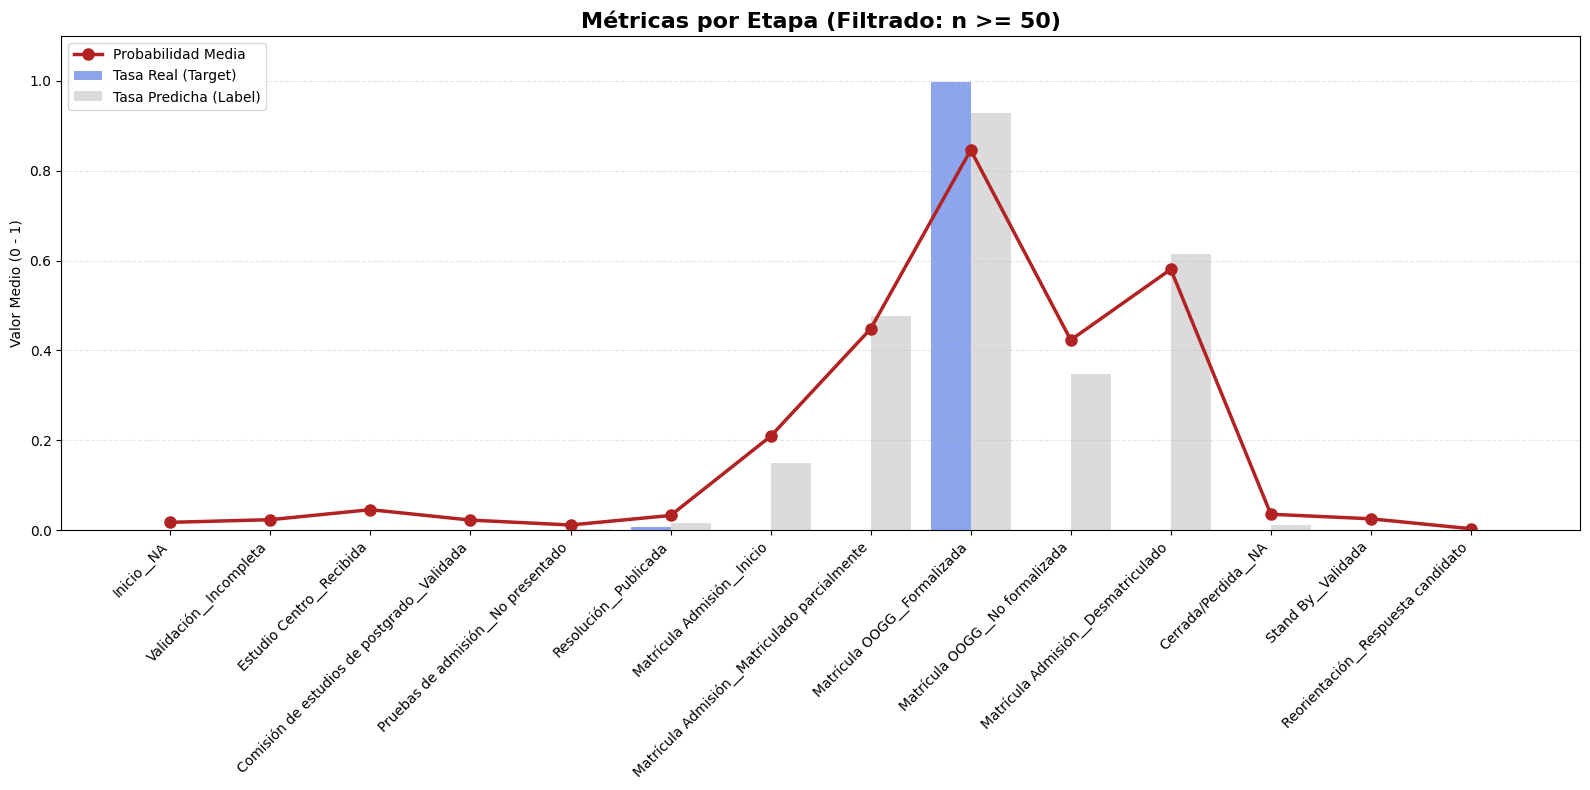

                             etapa_compuesta  tasa_real  prediction_label  prob_matricula_real  num_casos
                                  Inicio__NA   0.000000          0.001048             0.017519       4773
                      Validación__Incompleta   0.000000          0.000000             0.023418        340
                    Estudio Centro__Recibida   0.000000          0.000000             0.045700        294
 Comisión de estudios de postgrado__Validada   0.000000          0.000000             0.022496         79
          Pruebas de admisión__No presentado   0.000000          0.002395             0.011589       2505
                       Resolución__Publicada   0.006395          0.014980             0.032765      22830
                  Matrícula Admisión__Inicio   0.000000          0.149911             0.208992       2248
Matrícula Admisión__Matriculado parcialmente   0.000000          0.477373             0.448151       1812
                 Matrícula OOGG__Formalizada  

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# 1. Diccionario de Orden Cronológico Real
orden_admision = {
    'Inicio__NA': 0, 'Enviada__NA': 1,
    'Validación__Recibida': 2, 'Validación__Incompleta': 3, 'Validación__Completa': 4,
    'Estudio Centro__Recibida': 5, 'Comisión de estudios de postgrado__Recibida': 6,
    'Comisión de estudios de postgrado__Validada': 7, 'Propuesta centro__Recibida': 8,
    'Propuesta centro__Validada': 9, 'Pruebas de admisión__Convocado': 10,
    'Pruebas de admisión__No presentado': 11, 'Resolución__NA': 12,
    'Resolución__Publicada': 13, 'Matrícula Admisión__Inicio': 14,
    'Matrícula Admisión__Enviada': 15, 'Matrícula Admisión__Prematriculado': 16,
    'Matrícula Admisión__Pago mínimo': 17, 'Matrícula Admisión__Matriculado parcialmente': 18,
    'Matrícula OOGG__Formalizada': 19, 'Matrícula OOGG__No formalizada': 20,
    'Matrícula Admisión__Desmatriculado': 21, 'Cerrada/Perdida__NA': 22,
    'Stand By__Validada': 23, 'Reorientación__Respuesta candidato': 24
}
 
# 2. Preparación de Columnas
df['etapa_ordinal_num'] = df['etapa_compuesta'].map(orden_admision)
 
# 3. Cálculo de la Tabla de Métricas (Usando target normal y filtrando n < 50)
df_stats = df.groupby('etapa_compuesta').agg({
    'target': 'mean',                # Tasa de matriculación real (SIN propagar)
    'prediction_label': 'mean',      # Tasa de matriculación predicha
    'prob_matricula_real': 'mean',   # Media de probabilidad
    'etapa_ordinal_num': 'first',    # Para ordenar
    'ID': 'size'                     # Conteo de casos
}).reset_index()
 
# Renombrar columnas
df_stats = df_stats.rename(columns={'ID': 'num_casos', 'target': 'tasa_real'})
 
# --- FILTRO: Eliminar etapas con menos de 50 casos ---
df_stats = df_stats[df_stats['num_casos'] >= 50]
 
# Ordenar por el flujo lógico
df_stats = df_stats.sort_values('etapa_ordinal_num').dropna(subset=['etapa_ordinal_num'])
 
# 4. Visualización Comparativa
if not df_stats.empty:
    plt.figure(figsize=(16, 8))
    x_labels = df_stats['etapa_compuesta'].tolist()
    indices = np.arange(len(x_labels))
 
    plt.bar(indices - 0.2, df_stats['tasa_real'], width=0.4, label='Tasa Real (Target)', color='royalblue', alpha=0.6)
    plt.bar(indices + 0.2, df_stats['prediction_label'], width=0.4, label='Tasa Predicha (Label)', color='lightgray', alpha=0.8)
    plt.plot(indices, df_stats['prob_media' if 'prob_media' in df_stats else 'prob_matricula_real'],
             marker='o', color='firebrick', linewidth=2.5, label='Probabilidad Media', markersize=8)
 
    plt.xticks(indices, x_labels, rotation=45, ha='right')
    plt.title('Métricas por Etapa (Filtrado: n >= 50)', fontsize=16, fontweight='bold')
    plt.ylabel('Valor Medio (0 - 1)')
    plt.ylim(0, 1.1)
    plt.legend(loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
 
    # 5. Print final con el número de casos a la derecha
    print(df_stats[['etapa_compuesta', 'tasa_real', 'prediction_label', 'prob_matricula_real', 'num_casos']].to_string(index=False))
else:
    print("No hay etapas que cumplan con el mínimo de 50 casos.")

In [42]:
import pandas as pd
 
# 1. Definimos el diccionario de orden basado en TUS etapas reales
orden_admision = {
    'Inicio__NA': 0,
    'Enviada__NA': 1,
    'Validación__Recibida': 2,
    'Validación__Incompleta': 3,
    'Validación__Completa': 4,
    'Estudio Centro__Recibida': 5,
    'Comisión de estudios de postgrado__Recibida': 6,
    'Comisión de estudios de postgrado__Validada': 7,
    'Propuesta centro__Recibida': 8,
    'Propuesta centro__Validada': 9,
    'Pruebas de admisión__Convocado': 10,
    'Pruebas de admisión__No presentado': 11,
    'Resolución__NA': 12,
    'Resolución__Publicada': 13,
    'Matrícula Admisión__Inicio': 14,
    'Matrícula Admisión__Enviada': 15,
    'Matrícula Admisión__Prematriculado': 16,
    'Matrícula Admisión__Pago mínimo': 17,
    'Matrícula Admisión__Matriculado parcialmente': 18,
    'Matrícula OOGG__Formalizada': 19,
    'Matrícula OOGG__No formalizada': 20,
    'Matrícula Admisión__Desmatriculado': 21,
    'Cerrada/Perdida__NA': 22,
    'Stand By__Validada': 23,
    'Reorientación__Respuesta candidato': 24,
    'Cerrada/Perdida__Pruebas calificadas': 25
}
 
# 2. Aplicar el orden al DataFrame
df['etapa_ordinal_num'] = df['etapa_compuesta'].map(orden_admision)
 
# 3. Ver el camino que recorre cada Oportunidad (ID)
# (Cambiamos 'ID' por el nombre de tu columna identificadora, ej: 'OpportunityId')
col_id = 'ID'
 
flujo_por_id = (
    df.sort_values([col_id, 'etapa_ordinal_num'])
    .groupby(col_id)['etapa_compuesta']
    .apply(lambda x: ' -> '.join(x.unique()))
    .reset_index()
)
 
print("Ejemplo de flujos encontrados:")
print(flujo_por_id.head(10))
 
# 4. Verificar si hay etapas que se quedaron sin número (NaN)
faltantes = df[df['etapa_ordinal_num'].isna()]['etapa_compuesta'].unique()
if len(faltantes) > 0:
    print(f"\nOjo, estas etapas no estaban en el diccionario: {faltantes}")

Ejemplo de flujos encontrados:
                   ID                     etapa_compuesta
0  0066900001VRQMIAA5                 Cerrada/Perdida__NA
1  0066900001W0Y3GAAV          Matrícula Admisión__Inicio
2  0066900001Yx6O0AAJ                 Cerrada/Perdida__NA
3  0066900001b3gA3AAI                 Cerrada/Perdida__NA
4  0066900001cI6kHAAS                          Inicio__NA
5  0066900001cIKPHAA4                 Cerrada/Perdida__NA
6  0066900001cIgqaAAC         Matrícula OOGG__Formalizada
7  0066900001cIx1tAAC  Reorientación__Respuesta candidato
8  0066900001dFU4PAAW         Matrícula OOGG__Formalizada
9  0066900001dFmiuAAC         Matrícula OOGG__Formalizada


In [43]:
import pandas as pd

df = df_grado
 
# 1. Aseguramos que la columna etapa_compuesta esté creada y limpia
df['STAGENAME'] = df['STAGENAME'].astype(str).str.strip().replace('nan', 'NA')
df['PL_SUBETAPA'] = df['PL_SUBETAPA'].astype(str).str.strip().replace('nan', 'NA')
df['etapa_compuesta'] = df['STAGENAME'] + "__" + df['PL_SUBETAPA']
print(df['etapa_compuesta'].unique().tolist())
 
# 2. Mapeamos el orden (basado en tu lógica previa)
 
df['etapa_ordinal_num'] = df['etapa_compuesta'].map(orden_admision)
 
# 3. Agrupamos por ID de oportunidad para ver su histórico
# Nota: Sustituye 'OpportunityID' por el nombre real de tu columna de ID
resumen_etapas = (
    df.sort_values(by=['ID', 'etapa_ordinal_num'])
    .groupby('ID')['etapa_compuesta']
    .apply(lambda x: ' -> '.join(x.unique()))
    .reset_index()
)
 
# Mostramos los primeros resultados
print("Flujo de etapas por oportunidad:")
print(resumen_etapas.head(10))

['Cerrada/Perdida__NA', 'Matrícula Admisión__Inicio', 'Inicio__NA', 'Matrícula OOGG__Formalizada', 'Reorientación__Respuesta candidato', 'Pruebas de admisión__No presentado', 'Validación__Incompleta', 'Resolución__Publicada', 'Matrícula Admisión__Matriculado parcialmente', 'Matrícula Admisión__Desmatriculado', 'Resolución__NA', 'Estudio Centro__Recibida', 'Comisión de estudios de postgrado__Validada', 'Stand By__Validada', 'Matrícula Admisión__Prematriculado', 'Matrícula OOGG__No formalizada', 'Comisión de estudios de postgrado__Recibida', 'Enviada__NA', 'Validación__Recibida', 'Matrícula Admisión__Pago mínimo', 'Pruebas de admisión__Convocado', 'Cerrada/Perdida__Pruebas calificadas', 'Propuesta centro__Validada', 'Matrícula Admisión__Enviada', 'Validación__Completa', 'Propuesta centro__Recibida']
Flujo de etapas por oportunidad:
                   ID                     etapa_compuesta
0  0066900001VRQMIAA5                 Cerrada/Perdida__NA
1  0066900001W0Y3GAAV          Matrícula A

### Con Máster

In [44]:
import pandas as pd

# Cargar el Excel (única hoja)
df_master = pd.read_excel(r"C:\Users\0021878\Downloads\test_master_completo_con_scoring.xlsx")

# Vista rápida de las primeras filas
df_master.head(5) # Juan: Si pones un df_grado.head(5) sólo te muestra algunos registros :)

,ACCOUNTID,ID,ID18__PC,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,...,CH_ANTIGUO_ALUMNO__PC,CH_ALUMNI__PC,CH_ANTIGUOALUMNO_INTERCAMBIO,CH_HIJO_ANTIGUO_ALUMNO__PC,PCA1,PCA2,cluster,interpretacion_cluster,prediction_label,prob_matricula_real
0,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-5.463977,18.799213,4,Perfil mixto / no dominante,1,0.9869
1,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-1.021142,-1.619322,4,Perfil mixto / no dominante,1,0.9986
2,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.986269,-1.779593,4,Perfil mixto / no dominante,1,0.9988
3,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9982
4,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9982


In [45]:
df_master.shape

(3681, 60)

In [50]:
import pandas as pd

df = df_master
 
# 1. Aseguramos que la columna etapa_compuesta esté creada y limpia
df['STAGENAME'] = df['STAGENAME'].astype(str).str.strip().replace('nan', 'NA')
df['PL_SUBETAPA'] = df['PL_SUBETAPA'].astype(str).str.strip().replace('nan', 'NA')
df['etapa_compuesta'] = df['STAGENAME'] + "__" + df['PL_SUBETAPA']
print(df['etapa_compuesta'].unique().tolist())
 
# 2. Mapeamos el orden (basado en tu lógica previa)
 
df['etapa_ordinal_num'] = df['etapa_compuesta'].map(orden_admision)
 
# 3. Agrupamos por ID de oportunidad para ver su histórico
# Nota: Sustituye 'OpportunityID' por el nombre real de tu columna de ID
resumen_etapas = (
    df.sort_values(by=['ID', 'etapa_ordinal_num'])
    .groupby('ID')['etapa_compuesta']
    .apply(lambda x: ' -> '.join(x.unique()))
    .reset_index()
)
 
# Mostramos los primeros resultados
print("Flujo de etapas por oportunidad:")
print(resumen_etapas.head(10))

['Matrícula OOGG__Formalizada', 'Cerrada/Perdida__NA', 'Inicio__NA', 'Matrícula Admisión__Matriculado parcialmente', 'Resolución__Publicada', 'Estudio Centro__Recibida', 'Validación__Incompleta', 'Matrícula Admisión__Inicio', 'Matrícula Admisión__Desmatriculado', 'Matrícula OOGG__No formalizada', 'Stand By__Validada', 'Propuesta centro__Validada']
Flujo de etapas por oportunidad:
                   ID                               etapa_compuesta
0  0066900001dGFfXAAW                   Matrícula OOGG__Formalizada
1  0066900001dHM8xAAG                           Cerrada/Perdida__NA
2  0066900001dHaK2AAK                                    Inicio__NA
3  0066900001dHgpLAAS                                    Inicio__NA
4  0066900001hTovyAAC                                    Inicio__NA
5  0066900001k8CbzAAE  Matrícula Admisión__Matriculado parcialmente
6  006Tr000003rWG5IAM                         Resolución__Publicada
7  006Tr0000049XFNIA2                   Matrícula OOGG__Formalizada
8  00

In [51]:
import pandas as pd
 
# 1. Definimos el diccionario de orden basado en TUS etapas reales
orden_admision = {
    'Inicio__NA': 0,
    'Enviada__NA': 1,
    'Validación__Recibida': 2,
    'Validación__Incompleta': 3,
    'Validación__Completa': 4,
    'Estudio Centro__Recibida': 5,
    'Comisión de estudios de postgrado__Recibida': 6,
    'Comisión de estudios de postgrado__Validada': 7,
    'Propuesta centro__Recibida': 8,
    'Propuesta centro__Validada': 9,
    'Pruebas de admisión__Convocado': 10,
    'Pruebas de admisión__No presentado': 11,
    'Resolución__NA': 12,
    'Resolución__Publicada': 13,
    'Matrícula Admisión__Inicio': 14,
    'Matrícula Admisión__Enviada': 15,
    'Matrícula Admisión__Prematriculado': 16,
    'Matrícula Admisión__Pago mínimo': 17,
    'Matrícula Admisión__Matriculado parcialmente': 18,
    'Matrícula OOGG__Formalizada': 19,
    'Matrícula OOGG__No formalizada': 20,
    'Matrícula Admisión__Desmatriculado': 21,
    'Cerrada/Perdida__NA': 22,
    'Stand By__Validada': 23,
    'Reorientación__Respuesta candidato': 24,
    'Cerrada/Perdida__Pruebas calificadas': 25
}
 
# 2. Aplicar el orden al DataFrame
df['etapa_ordinal_num'] = df['etapa_compuesta'].map(orden_admision)
 
# 3. Ver el camino que recorre cada Oportunidad (ID)
# (Cambiamos 'ID' por el nombre de tu columna identificadora, ej: 'OpportunityId')
col_id = 'ID'
 
flujo_por_id = (
    df.sort_values([col_id, 'etapa_ordinal_num'])
    .groupby(col_id)['etapa_compuesta']
    .apply(lambda x: ' -> '.join(x.unique()))
    .reset_index()
)
 
print("Ejemplo de flujos encontrados:")
print(flujo_por_id.head(10))
 
# 4. Verificar si hay etapas que se quedaron sin número (NaN)
faltantes = df[df['etapa_ordinal_num'].isna()]['etapa_compuesta'].unique()
if len(faltantes) > 0:
    print(f"\nOjo, estas etapas no estaban en el diccionario: {faltantes}")

Ejemplo de flujos encontrados:
                   ID                               etapa_compuesta
0  0066900001dGFfXAAW                   Matrícula OOGG__Formalizada
1  0066900001dHM8xAAG                           Cerrada/Perdida__NA
2  0066900001dHaK2AAK                                    Inicio__NA
3  0066900001dHgpLAAS                                    Inicio__NA
4  0066900001hTovyAAC                                    Inicio__NA
5  0066900001k8CbzAAE  Matrícula Admisión__Matriculado parcialmente
6  006Tr000003rWG5IAM                         Resolución__Publicada
7  006Tr0000049XFNIA2                   Matrícula OOGG__Formalizada
8  006Tr000005JrNYIA0                                    Inicio__NA
9  006Tr000006V1nZIAS                                    Inicio__NA


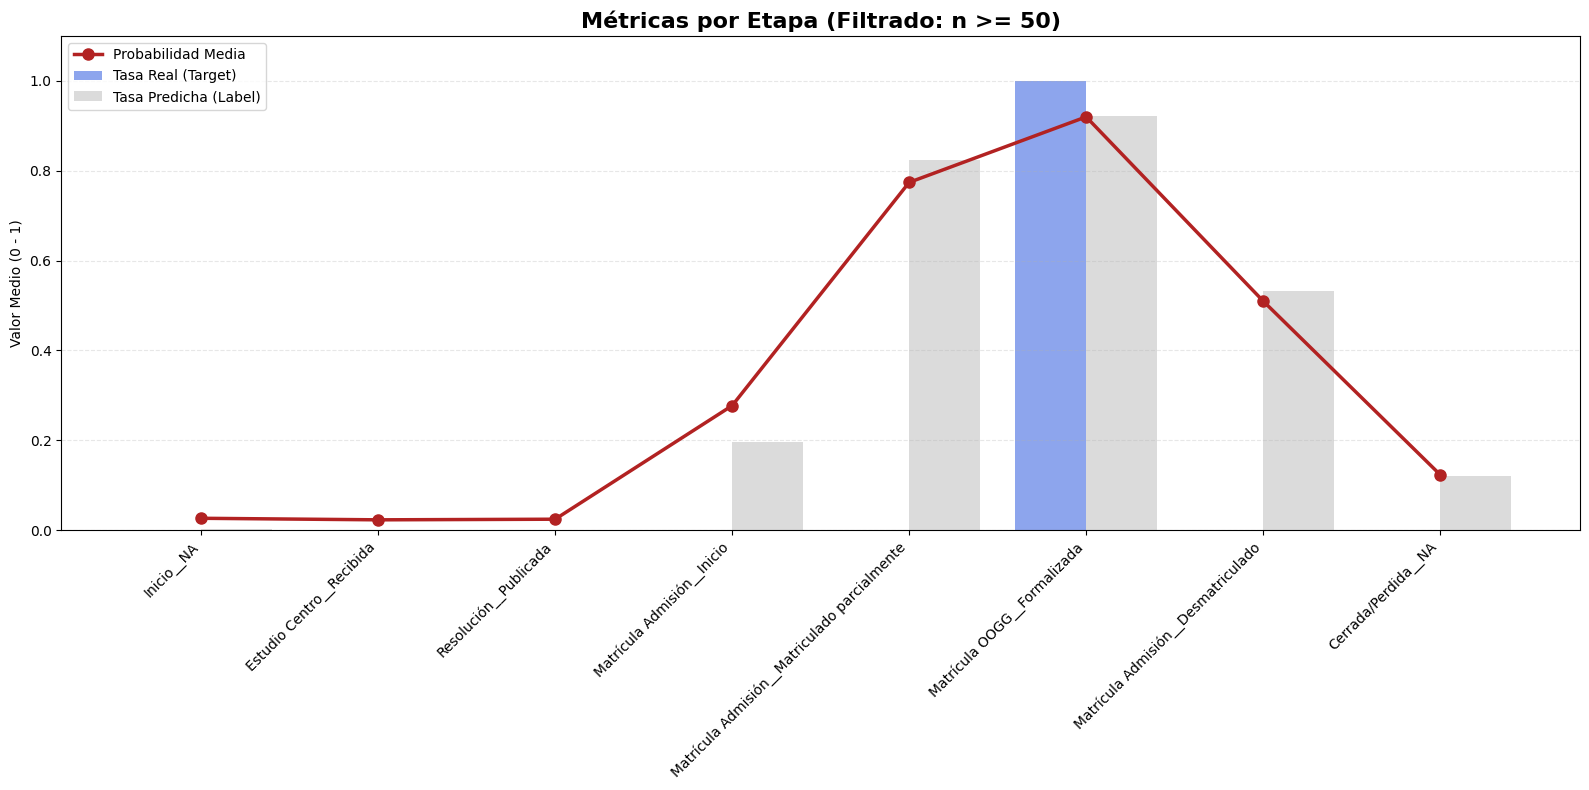

                             etapa_compuesta  tasa_real  prediction_label  prob_matricula_real  num_casos
                                  Inicio__NA        0.0          0.002433             0.026531        411
                    Estudio Centro__Recibida        0.0          0.000000             0.023093         58
                       Resolución__Publicada        0.0          0.000000             0.024453        598
                  Matrícula Admisión__Inicio        0.0          0.196429             0.277182         56
Matrícula Admisión__Matriculado parcialmente        0.0          0.823529             0.773884         68
                 Matrícula OOGG__Formalizada        1.0          0.922258             0.919704       2161
          Matrícula Admisión__Desmatriculado        0.0          0.532258             0.509887         62
                         Cerrada/Perdida__NA        0.0          0.119565             0.123523        184


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# 1. Diccionario de Orden Cronológico Real
orden_admision = {
    'Inicio__NA': 0, 'Enviada__NA': 1,
    'Validación__Recibida': 2, 'Validación__Incompleta': 3, 'Validación__Completa': 4,
    'Estudio Centro__Recibida': 5, 'Comisión de estudios de postgrado__Recibida': 6,
    'Comisión de estudios de postgrado__Validada': 7, 'Propuesta centro__Recibida': 8,
    'Propuesta centro__Validada': 9, 'Pruebas de admisión__Convocado': 10,
    'Pruebas de admisión__No presentado': 11, 'Resolución__NA': 12,
    'Resolución__Publicada': 13, 'Matrícula Admisión__Inicio': 14,
    'Matrícula Admisión__Enviada': 15, 'Matrícula Admisión__Prematriculado': 16,
    'Matrícula Admisión__Pago mínimo': 17, 'Matrícula Admisión__Matriculado parcialmente': 18,
    'Matrícula OOGG__Formalizada': 19, 'Matrícula OOGG__No formalizada': 20,
    'Matrícula Admisión__Desmatriculado': 21, 'Cerrada/Perdida__NA': 22,
    'Stand By__Validada': 23, 'Reorientación__Respuesta candidato': 24
}
 
# 2. Preparación de Columnas
df['etapa_ordinal_num'] = df['etapa_compuesta'].map(orden_admision)
 
# 3. Cálculo de la Tabla de Métricas (Usando target normal y filtrando n < 50)
df_stats = df.groupby('etapa_compuesta').agg({
    'target': 'mean',                # Tasa de matriculación real (SIN propagar)
    'prediction_label': 'mean',      # Tasa de matriculación predicha
    'prob_matricula_real': 'mean',   # Media de probabilidad
    'etapa_ordinal_num': 'first',    # Para ordenar
    'ID': 'size'                     # Conteo de casos
}).reset_index()
 
# Renombrar columnas
df_stats = df_stats.rename(columns={'ID': 'num_casos', 'target': 'tasa_real'})
 
# --- FILTRO: Eliminar etapas con menos de 50 casos ---
df_stats = df_stats[df_stats['num_casos'] >= 50]
 
# Ordenar por el flujo lógico
df_stats = df_stats.sort_values('etapa_ordinal_num').dropna(subset=['etapa_ordinal_num'])
 
# 4. Visualización Comparativa
if not df_stats.empty:
    plt.figure(figsize=(16, 8))
    x_labels = df_stats['etapa_compuesta'].tolist()
    indices = np.arange(len(x_labels))
 
    plt.bar(indices - 0.2, df_stats['tasa_real'], width=0.4, label='Tasa Real (Target)', color='royalblue', alpha=0.6)
    plt.bar(indices + 0.2, df_stats['prediction_label'], width=0.4, label='Tasa Predicha (Label)', color='lightgray', alpha=0.8)
    plt.plot(indices, df_stats['prob_media' if 'prob_media' in df_stats else 'prob_matricula_real'],
             marker='o', color='firebrick', linewidth=2.5, label='Probabilidad Media', markersize=8)
 
    plt.xticks(indices, x_labels, rotation=45, ha='right')
    plt.title('Métricas por Etapa (Filtrado: n >= 50)', fontsize=16, fontweight='bold')
    plt.ylabel('Valor Medio (0 - 1)')
    plt.ylim(0, 1.1)
    plt.legend(loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
 
    # 5. Print final con el número de casos a la derecha
    print(df_stats[['etapa_compuesta', 'tasa_real', 'prediction_label', 'prob_matricula_real', 'num_casos']].to_string(index=False))
else:
    print("No hay etapas que cumplan con el mínimo de 50 casos.")